In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
from spotifyconfig import SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
artist_name = []
track_name = []
popularity = []
track_id = []
images = []

for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2023', type='track', limit=50, offset=i)
    for t in track_results['tracks']['items']:
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])

In [5]:
track_dataframe = pd.DataFrame({
    'Artist': artist_name,
    'Track': track_name,
    'Track ID': track_id,
    'Popularity': popularity,
    'Image URL': images
})

# Sort by popularity (descending)
df_sorted = track_dataframe.sort_values(by='Popularity', ascending=False).reset_index(drop=True)

# Display the first 10 most popular tracks
df_sorted.head(10)
print(df_sorted.head())

         Artist                                           Track  \
0    The Weeknd  One Of The Girls (with JENNIE, Lily Rose Depp)   
1   Teddy Swims                                    Lose Control   
2   Don Toliver                                         No Pole   
3          Feid                                            LUNA   
4  Travis Scott                      FE!N (feat. Playboi Carti)   

                 Track ID  Popularity  \
0  7CyPwkp0oE8Ro9Dd5CUDjW          90   
1  17phhZDn6oGtzMe56NuWvj          89   
2  0eaVIYo2zeOaGJeqZ5TwYz          87   
3  7bywjHOc0wSjGGbj04XbVi          87   
4  42VsgItocQwOQC3XWZ8JNA          86   

                                           Image URL  
0  https://i.scdn.co/image/ab67616d0000b273b0dd6a...  
1  https://i.scdn.co/image/ab67616d0000b2731a0323...  
2  https://i.scdn.co/image/ab67616d0000b273f5e27c...  
3  https://i.scdn.co/image/ab67616d0000b273f1aad8...  
4  https://i.scdn.co/image/ab67616d0000b273881d8d...  


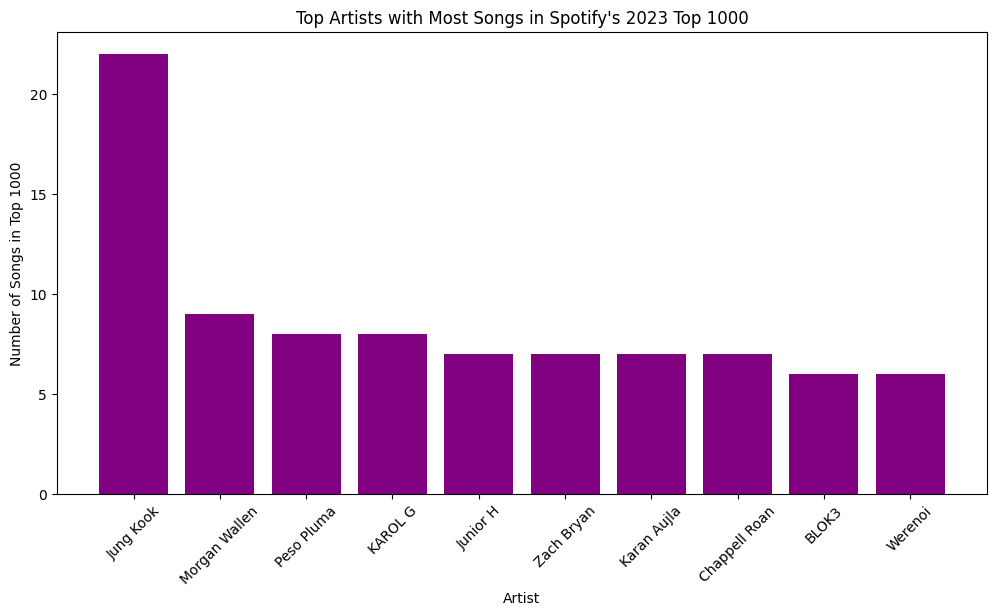

In [11]:
artist_counts = track_dataframe['Artist'].value_counts()
most_successful_artists = artist_counts.head(10)

# Plot the results
plt.figure(figsize=(12,6))
plt.bar(most_successful_artists.index, most_successful_artists.values, color='purple')
plt.xlabel("Artist")
plt.ylabel("Number of Songs in Top 1000")
plt.title("Top Artists with Most Songs in Spotify's 2023 Top 1000")
plt.xticks(rotation=45)
plt.show()